In [1]:
library(gridExtra)
library(faraway)
library(broom)
library(tidyverse)
library(leaps)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1: Data Description
Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

The customer personality analysis is a dataset that links customer's status with their purchase patterns. There are a total of 2240 observations and 27 variables split into 4 groups. 
- People, the personal data of customer.
- Products, the amount customer spent on a certain type of product in the last 2 years
- Promotion, whether or not customers participated in past promotions/discounts
- Place, where and amount the customer made the purchase

This dataset is provided by Dr. Omar Romero-Hernandez and the method of collection is not explicitly stated.

In [2]:
urlfile = "https://raw.githubusercontent.com/LucassHo/stat301dataset/refs/heads/main/marketing_campaign.csv"
personality <- read_delim(url(urlfile), delim= "\t")

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 2: Question

#### Can we predict the number of purchases made with a discount based on household income, education level, number of web visits, and number of children in the household?

This question is both predictive, since we aim to make accurate predictions based on current customers data.

- NumDealsPurchase is our response variable, it is a discrete numerical variable which explains the number of purchases made with a discount
- Income is one of our explanatory variable. It is a continuous numerical variable which details the household income of the individual
- Education is one of our explanatory variable. It is a categorical variable which explains the level of education of the individual
- NumWebVisitsMonth is one of our explanatory variable. It is a discrete numerical variable which explains the number of web visits the individual makes each month
- Kidhome is one of our explanatory variable. It is a discrete numerical variable which explains the number of children in the household

## 3: Exploratory Data Analysis and Visualization

To begin, we will look for na values in the dataset

In [3]:
nas <- colSums(is.na(personality))
nas

ID          Year_Birth           Education      Marital_Status 
                  0                   0                   0                   0 
             Income             Kidhome            Teenhome         Dt_Customer 
                 24                   0                   0                   0 
            Recency            MntWines           MntFruits     MntMeatProducts 
                  0                   0                   0                   0 
    MntFishProducts    MntSweetProducts        MntGoldProds   NumDealsPurchases 
                  0                   0                   0                   0 
    NumWebPurchases NumCatalogPurchases   NumStorePurchases   NumWebVisitsMonth 
                  0                   0                   0                   0 
       AcceptedCmp3        AcceptedCmp4        AcceptedCmp5        AcceptedCmp1 
                  0                   0                   0                   0 
       AcceptedCmp2            Complain       Z_CostContact           Z_Revenue 
                  0                   0                   0                   0 
           Response 
                  0

In [4]:
no_income <- personality |> filter(is.na(personality$Income))
no_income

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1994,1983,Graduation,Married,NA,1,0,15-11-2013,11,5,⋯,7,0,0,0,0,0,0,3,11,0
5255,1986,Graduation,Single,NA,1,0,20-02-2013,19,5,⋯,1,0,0,0,0,0,0,3,11,0
7281,1959,PhD,Single,NA,0,0,05-11-2013,80,81,⋯,2,0,0,0,0,0,0,3,11,0
7244,1951,Graduation,Single,NA,2,1,01-01-2014,96,48,⋯,6,0,0,0,0,0,0,3,11,0
8557,1982,Graduation,Single,NA,1,0,17-06-2013,57,11,⋯,6,0,0,0,0,0,0,3,11,0
10629,1973,2n Cycle,Married,NA,1,0,14-09-2012,25,25,⋯,8,0,0,0,0,0,0,3,11,0
8996,1957,PhD,Married,NA,2,1,19-11-2012,4,230,⋯,9,0,0,0,0,0,0,3,11,0
9235,1957,Graduation,Single,NA,1,1,27-05-2014,45,7,⋯,7,0,0,0,0,0,0,3,11,0
5798,1973,Master,Together,NA,0,0,23-11-2013,87,445,⋯,1,0,0,0,0,0,0,3,11,0


As seen above, there are 24 na values in Income. Since there are 2240 observations and only 24 has na values, where there doesn't seem to be any relation between each missing value, they will be removed instead of imputed.

In [5]:
personality <- personality |> drop_na(Income)
count(personality)

n
<int>
2216


To create a plot that studies the relationship between target, education and income, we can do

`geom_smooth()` using formula = 'y ~ x'


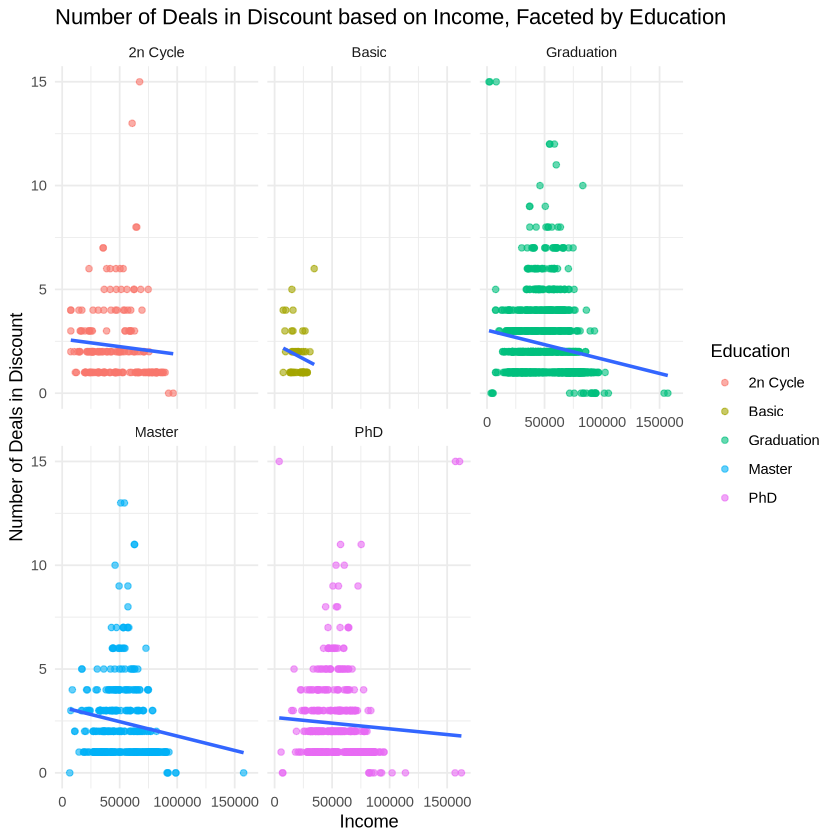

In [6]:
personality_clean <- personality |> filter(Income < 300000) # Filter outliers

plot <- personality_clean |> 
    ggplot(aes(x = Income, y = NumDealsPurchases)) +
    geom_point(alpha = 0.6, aes(color = Education)) +
    geom_smooth(method = "lm", se = FALSE) +
    labs(x = "Income", y = "Number of Deals in Discount", 
         title = "Number of Deals in Discount based on Income, Faceted by Education") +
    facet_wrap(~Education) +
    theme_minimal()

plot

This plot is important education may be positively correlated with income, which could lead to multicollinearity

## 4: Methods and Plan

Since our target is a type of count, we can use Poisson Regression to answer the question, it ensures that our prediction will always be non-negative, and provides direct indication on how each variable affects our target

To use poisson regression, we assume that
- Each observation is independent
- NumDealsPurchases follows a poisson distribution
- NumDealsPurchases is a non-negative integer

Some limitations of poisson regression include poor performance if observations are correlated, and overdispersion when variance is much greater than the mean

## 5: Computational Code and Output

In [7]:
poisson_model <- glm(NumDealsPurchases ~ Income + Education + Kidhome + NumWebPurchases, 
                     family = poisson, data = personality_clean)

# Display model summary
summary <- poisson_model |> summary()
coef <- as.data.frame(coef(summary))
coef

,Estimate,Std. Error,z value,Pr(>|z|)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.626127e-01,6.760832e-02,6.8425420,7.780007e-12
Income,-5.705459e-06,8.173177e-07,-6.9807117,2.936885e-12
EducationBasic,-2.436875e-01,1.135529e-01,-2.1460255,3.187094e-02
EducationGraduation,1.858396e-02,5.108048e-02,0.3638173,7.159945e-01
EducationMaster,7.143933e-02,5.793973e-02,1.2329939,2.175780e-01
EducationPhD,3.731720e-02,5.597447e-02,0.6666824,5.049750e-01
Kidhome,4.158721e-01,2.908506e-02,14.2984796,2.236422e-46
NumWebPurchases,1.023436e-01,4.465919e-03,22.9165857,3.175208e-116


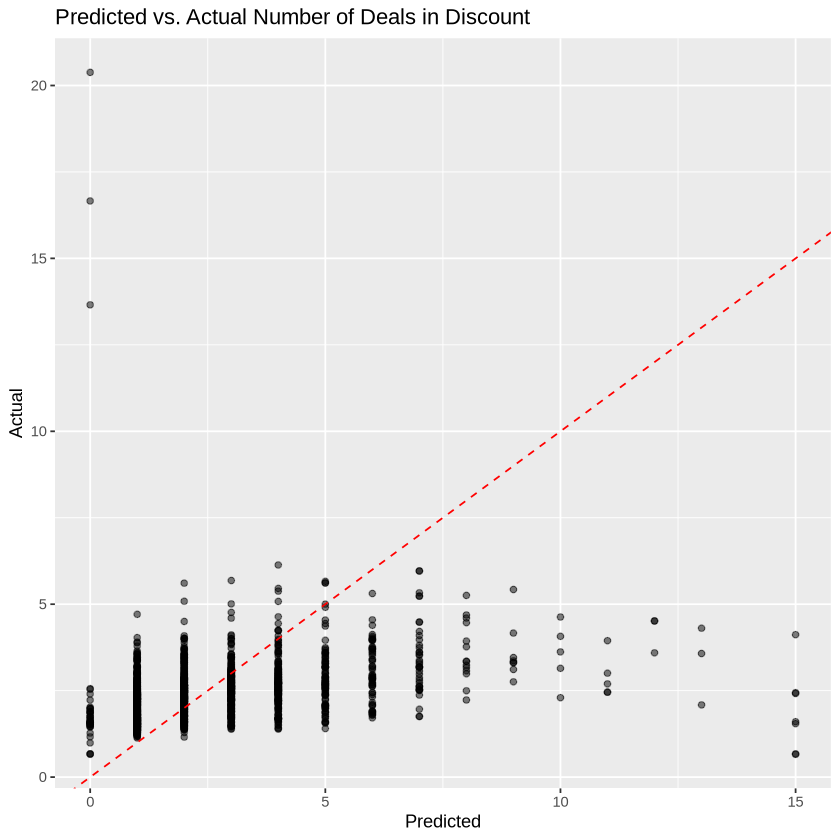

In [8]:
personality_clean <- personality_clean |> mutate(predicted = predict(poisson_model, type = "response"))

# Plot actual vs predicted values
predicted_plot <- personality_clean |> ggplot(aes(x = NumDealsPurchases, y = predicted)) +
    geom_point(alpha = 0.5) +
    geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
    labs(title = "Predicted vs. Actual Number of Deals in Discount",
         x = "Predicted", y = "Actual")
predicted_plot

In [9]:
rmse <- sqrt(mean((personality_clean$NumDealsPurchases - personality_clean$predicted)^2))
rmse

[1] 1.811871

As seen from the above results, on average, each prediction has an expected error of 1.81, it also seems like the model's accuracy greatly drops when actual values are > 8.

This might be due to variance being significantly different than the mean and/or variables not having log-linear relationship.

- A good way to achieve better prediction is to use lasso models to find the best explanatory variables, since according to p-values, education is mostly not correlated with our target